In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

In [24]:
def synthesize_data(mean_0, cov_0, mean_1, cov_1, n):
    x_0 = np.random.multivariate_normal(mean_0, cov_0, n)
    x_1 = np.random.multivariate_normal(mean_1, cov_1, n)
    X = np.concatenate((x_0, x_1))
    
    y = np.concatenate((np.zeros(n), np.ones(n)))
    
    return X, y

In [25]:
mean_0 = np.array([-2, -2])
mean_1 = np.array([2, 2])

cov_0 = cov_1 = np.identity(2)

In [32]:
X, y = synthesize_data(mean_0, cov_0, mean_1, cov_1, 500)

In [50]:
def logistic_plot(X, y):
    # Fit the data to a logistic regression model.
    clf = sklearn.linear_model.LogisticRegression(fit_intercept=False)
    clf.fit(X, y)

    # Retrieve the model parameters.
    b = clf.intercept_[0]
    w1, w2 = clf.coef_.T
    print(w1, w2, clf.coef_, clf.coef_.shape)
    # Calculate the intercept and gradient of the decision boundary.
    c = -b/w2
    m = -w1/w2
    
    # Plot the data and the classification with the decision boundary.
    xmin, xmax = -10, 10
    ymin, ymax = -10, 10
    xd = np.array([xmin, xmax])
    yd = m*xd + c
    plt.plot(xd, yd, 'k', lw=1, ls='--')
    plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
    plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

    plt.scatter(*X[y==0].T, s=8, alpha=0.5)
    plt.scatter(*X[y==1].T, s=8, alpha=0.5)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.ylabel(r'$x_2$')
    plt.xlabel(r'$x_1$')

    plt.show()

0.0
[2.31503404] [2.13160661] [[2.31503404 2.13160661]] (1, 2)


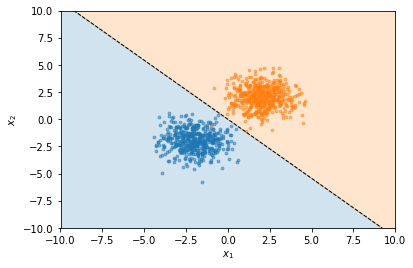

In [51]:
logistic_plot(X, y)

0.0
[1.39226198] [2.8298304] [[1.39226198 2.8298304 ]] (1, 2)


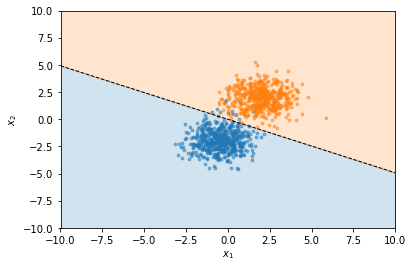

In [52]:
mean_0_shifted = mean_0 + np.array([1.5, 0])
X_mean_shifted, y_mean_shifted = synthesize_data(mean_0_shifted, cov_0, mean_1, cov_1, 500)
logistic_plot(X_mean_shifted, y_mean_shifted)

0.0
[1.21958077] [1.46688024] [[1.21958077 1.46688024]] (1, 2)


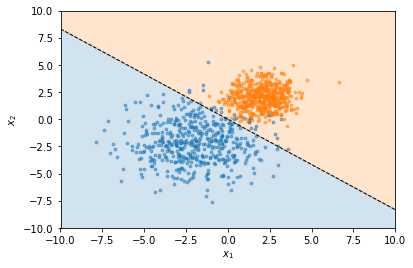

In [53]:
cov_0_shifted = cov_0 * 4
X_cov_shifted, y_cov_shifted = synthesize_data(mean_0, cov_0_shifted, mean_1, cov_1, 500)
logistic_plot(X_cov_shifted, y_cov_shifted)

0.0
[0.57347041] [1.3596303] [[0.57347041 1.3596303 ]] (1, 2)


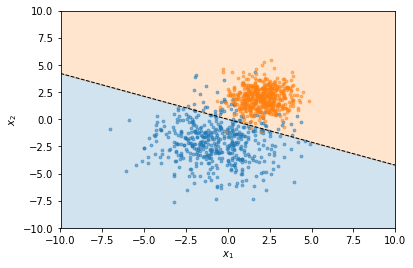

In [54]:
X_both_shifted, y_both_shifted = synthesize_data(mean_0_shifted, cov_0_shifted, mean_1, cov_1, 500)
logistic_plot(X_both_shifted, y_both_shifted)